###Ejercicio 6
Explique cuál es diferencia entre localización de objetos y clasificación de imágenes. Muestre ejemplos de ello.

#####*Clasificación de imágenes:*


Se refiere a la capacidad de los algoritmos de IA para analizar una imagen y asignarla a una categoría específica. Reconocer patrones visuales y asociarlos con etiquetas predefinidas.

Por ejemplo, si presentas a la computadora una imagen de un perro, la tarea de clasificación consistiría en etiquetarla correctamente como "perro".

Este proceso es fundamental en la visión por computadora y tiene aplicaciones en campos tan diversos como la identificación de enfermedades a partir de imágenes médicas o la clasificación de productos en líneas de producción.

#####*Detección de objetos:*
Es un paso más allá de la clasificación de imágenes, ya que no solo identifica el contenido general de una imagen, sino que también localiza y delimita la posición de los objetos dentro de ella.

Ejemplo, una cámara de seguridad que necesita identificar y rastrear movimientos sospechosos en un estacionamiento este permitiría a la computadora detectar no solo la presencia de personas o vehículos, sino también trazar un "cuadro delimitador" alrededor de ellos para seguir su movimiento.

Este enfoque es esencial en aplicaciones como la conducción autónoma, donde los vehículos deben identificar y evitar obstáculos en tiempo real.

• Ejemplo de aplicación combinada:

Considere un sistema de seguridad para un banco que utiliza cámaras de vigilancia. La clasificación de imágenes podría ayudar a identificar si hay personas presentes en la escena, mientras que la detección de objetos permitiría distinguir entre clientes y posibles intrusos. Al combinar ambas técnicas, el sistema puede alertar al personal de seguridad sobre cualquier actividad sospechosa, como un individuo merodeando cerca de la entrada después del horario de cierre. Esta sinergia entre clasificación de imágenes y detección de objetos es fundamental para el funcionamiento efectivo de sistemas de vigilancia avanzados.

- Clasificación de imagénes



In [3]:
!pip install tensorflow pillow

import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
from PIL import Image
import numpy as np


In [4]:
#modelo preentrenado EfficientNetB0
model = EfficientNetB0(weights='imagenet')

def classify_image(img_path):
    # preparar la imagen
    img = Image.open(img_path)
    img = img.resize((224, 224))

    # convertir la imagen a un array y procesarla
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    #predicción con el modelo
    predictions = model.predict(img_array)

    # decodificar y retornar las predicciones
    return decode_predictions(predictions, top=3)[0]

# imagen local
img_path = '/content/foto_ej6.jpeg'
predictions = classify_image(img_path)

print('\n')

# predicciones
for i, (imagenet_id, label, score) in enumerate(predictions):
    print(f"{i + 1}: {label} ({score:.2f})")

35363/35363 [==============================] - 0s 0us/step


1: moped (0.76)
2: motor_scooter (0.11)
3: tricycle (0.01)


Detectó de buena manera que la imagen es una moto.

- Detección de objetos

In [5]:
!pip install ultralytics

from ultralytics import YOLO
from IPython.display import Image
import cv2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 750.4/750.4 kB 8.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

100%|██████████| 6.23M/6.23M [00:00<00:00, 55.1MB/s]



0: 448x640 7 chairs, 1 dining table, 1 tv, 720.9ms
Speed: 29.7ms preprocess, 720.9ms inference, 2888.5ms postprocess per image at shape (1, 3, 448, 640)


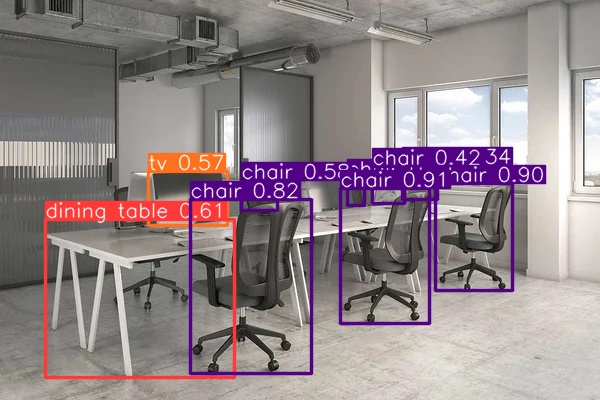

In [6]:
#modelo preentrenado YOLOv8
model = YOLO('yolov8n')

source_img = cv2.imread('/content/foto_ej6.1.webp')
results = model(source_img)

# Visualize the results on the frame
annotated_frame = results[0].plot()

# resultado en JPG
cv2.imwrite('oficina_results.jpg', annotated_frame)


Image('oficina_results.jpg')